# <center>Analyzing NFL Play-By-Plays</center>
<center><b><i>Raveesha Arora & Juhi Rajgopal</i></b></center>

<img src="nfl-intro.jpg">

## Introduction

The National Football League (NFL) has 32 teams, which are split into two conferences: the American Football Conference (AFC) and the National Football Conference (NFC). Each of these conferences are then further split into four divisions: North, South, East, and West. Every year, all these teams ultimately compete for the grand prize, the Superbowl. Six teams from each conference, a total of 12 teams, make the playoffs, from which only two teams make the Superbowl. 

Teams hope to win games by scoring the more points than the opposing team. Teams score points by passing or carrying the ball into the endzone (a touchdown) or kicking the ball into the opponent’s end zone (field goal). Touchdowns are worth 6 points while field goals are worth 3 points. As with many other sports, the offense tries to score the points whereas the defense tries to stop the offense from scoring.

The field is 100 yards. The offense has 4 downs to advance the ball 10 yards. A down is a period of action that starts when the ball is put into play and ends when the ball is ruled dead (meaning the play is completed). If the offense does not advance at least this 10 yards, they are usually forced to surrender the ball to the opponent. More key terms and player positions are provided in this <a href="https://www.dummies.com/sports/football/football-for-dummies-usa-edition-cheat-sheet/">link</a>.

Football is a staple of American culture as it is one of the most watched sport in the United States. Data analysis in the NFL can prove to be extremely useful. Teams can track player metrics, offensive statistics such as passing and rushing yards, and defensive indicators such as interceptions. This is useful in that teams can see areas of improvement and compare their performance with their division rivals and other teams.  

The dataset chosen included every play from every game through Week 11 in the current 2019 NFL season. The data included many variables such as game data, which team was on offense and defense, time of the play, type of play, and yards gained as well as many other variables. The focus of this project was to compare various matrics across teams. These measures can be used to understand why certain teams are performing better than others. 

## Getting Started with the Data!!

### Libraries
We have used the following libraries in order to conduct the data analysis: 
<ul>
    <li><b>Pandas</b>: used for data display and manipulation</li>
    <li><b>Numpy</b>: provides a multidimensional array object</li>
    <li><b>Datetime</b>: used to manipulate date and time objects</li>
    <li><b>Matplotlib - pyplot</b>: used for plotting Pandas data into graphs and charts</li>
    <li><b>Seaborn</b>: provides a high-level interface for plotting data into graphs</li>
    <li><b>Scikit-learn</b>: popular machine learning library</li>
    <ul>
        <li>linear_model: used to create a linear regression model</li>
        <li>tree: used to create a decision tree model</li>
    </ul>
    <li><b>Statsmodels - api</b>: used to calculate models and statistics with multiple linear regression</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.transforms
import seaborn as sns

from sklearn import tree, linear_model, model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from statsmodels import api as sm

# Datasets

The primary dataset listed every play for the NFL 2019 regular seson games up until November 21st or Week 11 of the season. It contained a description of the play, yards gained from the play, which down, whether a player received a penalty, among other factors. This dataset, however, did not include the number of points scored, the conference/division for the offense and defense teams, what week of the season the game occurred and whether or not a field goals was made. Since these are important statistics we used later on in our analysis, we merged this main dataset with a couple of other datasets which contain this information. 

The main dataset was found on <a href="http://nflsavant.com/about.php">NFLSavant.com</a>. Since the data contained some columns such as "PassType" and "IsSack", which was not used in our analysis, we dropped many columns and only kept the columns used during our analysis.

In [3]:
# import csv file 
nfl_data = pd.read_csv('pbp-2019.csv')

# columns to keep
nfl_data = nfl_data[['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 
                     'ToGo', 'YardLine', 'SeriesFirstDown', 'Description', 'Yards', 'PlayType', 'IsRush', 'IsPass',
                     'IsTouchdown', 'IsSack', 'IsInterception', 'IsFumble', 'IsPenalty', 'YardLineFixed', 'IsPenaltyAccepted', 
                     'PenaltyTeam', 'IsNoPlay', 'PenaltyType','PenaltyYards']]
nfl_data.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsSack,IsInterception,IsFumble,IsPenalty,YardLineFixed,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2019100300,2019-10-03,1,2,29,SEA,LA,1,10,50,...,0,0,0,0,50,0,NaN,0,NaN,0
1,2019101301,2019-10-13,4,9,45,BAL,CIN,1,10,56,...,0,0,0,0,44,0,NaN,0,NaN,0
2,2019110309,2019-11-03,4,12,55,CLE,DEN,1,10,67,...,0,0,0,0,33,0,NaN,0,NaN,0
3,2019110309,2019-11-03,4,12,12,CLE,DEN,1,10,78,...,0,0,0,0,22,0,NaN,0,NaN,0
4,2019110309,2019-11-03,4,11,44,CLE,DEN,2,11,77,...,0,0,0,0,23,0,NaN,0,NaN,0


The second dataset we used also contains all the plays from the NFL 2019 regular season till week 12, but included even more columns than the dataset above. Since the main dataset was already condensed to most of the columns we wanted, we used that and just merged the 'field_goal_result' to obtain whether or not a field was made for the field goal plays in the above dataset. In order to do this, we needed the teams, data, quarter, time, and result from this dataset.

This dataset was found on Github at this <a href="https://github.com/ryurko/nflscrapR-data/tree/master/play_by_play_data/regular_season">link</a>.

In [4]:
# import different csv that includes field goal data
nfl_data2 = pd.read_csv('reg_pbp_2019.csv')
nfl_data2 = nfl_data2[['posteam', 'defteam', 'game_date', 'qtr', 'down', 'field_goal_result', 'time']]
nfl_data2 = nfl_data2[nfl_data2['field_goal_result'].notnull()]
nfl_data2.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,167,168,191,192,227,228,240) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,posteam,defteam,game_date,qtr,down,field_goal_result,time
22,CHI,GB,2019-09-05,1,4.0,made,04:14:00
145,GB,CHI,2019-09-05,4,4.0,made,05:20:00
208,CAR,LA,2019-09-08,1,4.0,missed,00:47:00
216,LA,CAR,2019-09-08,2,4.0,made,13:48:00
250,LA,CAR,2019-09-08,2,4.0,made,01:07:00


The third dataset used stores all the information about the conference and division of each team. The original dataset contained columns with team name, team acronym, conference, division. For our analysis, we needed the Conference and then the Conference and Division to analyze different statistics between the four teams of that division. To tidy the data, we dropped the Division column and renamed the 'ConferenceAndDivision' column to 'Division' to designate these groups of 4. 

This dataset was found on Github at this <a href="https://gist.github.com/cnizzardini/13d0a072adb35a0d5817">link</a>.

In [5]:
# import csv with nfl divisions  
nfl_div = pd.read_csv('nfl_teams.csv')
nfl_div = nfl_div.drop(['ID'], axis=1)
nfl_div = nfl_div.rename(columns={"Abbreviation": "Team"})

# merge conference and division to create full division name
nfl_div['Division'] = nfl_div['Conference'] + ' ' + nfl_div['Division']

# create map from team name to team acronym
teamAcy = {}
for  index, row in nfl_div.iterrows():
    fullName = row['Name']
    teamAcy[fullName] = row['Team']

nfl_div.head()

,Name,Team,Conference,Division
0,Arizona Cardinals,ARI,NFC,NFC West
1,Atlanta Falcons,ATL,NFC,NFC South
2,Baltimore Ravens,BAL,AFC,AFC North
3,Buffalo Bills,BUF,AFC,AFC East
4,Carolina Panthers,CAR,NFC,NFC South


The fourth dataset we used also contains scores for games every week, along with the week number, so we obtained both the points and week number through this dataset. To tidy it, we first converted the date to be the same format as what is in our main dataset. We then created a dictionary to keep track of every date and what week it corresponded to. We then melted the data so that team is in one column by splitting every game into two rows, one corresponding to the winner/tied and the other corresponding to the loser/tied. 

This dataset was found on Pro Football Reference at this <a href="https://www.pro-football-reference.com/years/2019/games.htm">link</a>.

In [6]:
# add week of game to dataframe by pulling from another csv

# import csv with game data for including week 
nfl_gameweek = pd.read_csv('nfl_gameweeks.csv')

# format date col to match gamedate format from nfl_data
def convert_date_format(date):
    d = datetime.strptime(date, '%d-%b')
    return(d.strftime('2019-%m-%d'))

nfl_gameweek['FormatDate'] = nfl_gameweek['Date'].apply(convert_date_format)

# create hashmap of gamedays and week with date as key
weeks = {}
for  index, row in nfl_gameweek.iterrows():
    date = row['FormatDate']
    weeks[date] = row['Week']

# make index a column in nfl_gameweek
nfl_gameweek.insert(0, 'Id', nfl_gameweek.index)

# create differentials dataframe with winners and losers from each week and points for each team
differentials = nfl_gameweek.copy()[['Week', 'FormatDate', 'Winner/tie', 'Loser/tie', 'PtsW', 'PtsL']]
differentials['Winner/tie'] = differentials['Winner/tie'].apply(lambda x: teamAcy.get(x))
differentials['Loser/tie'] = differentials['Loser/tie'].apply(lambda x: teamAcy.get(x))

# melt data so that team is one column
nfl_gameweek = pd.melt(nfl_gameweek, id_vars = ['Id', 'Week', 'PtsW', 'PtsL'], 
                       value_vars =['Winner/tie', 'Loser/tie'])
nfl_gameweek = nfl_gameweek.dropna()
nfl_gameweek = nfl_gameweek.rename(columns={"variable": "Win/Lose", "value": "Team"})

# merge ptsW and ptsL into one pts columns
nfl_gameweek['Pts'] = np.where(nfl_gameweek['Win/Lose'] == 'Winner/tie', nfl_gameweek['PtsW'], nfl_gameweek['PtsL'])

# drop ptsW and ptsL columns 
nfl_gameweek = nfl_gameweek[['Week', 'Win/Lose', 'Team', 'Pts']]

# change team name to acronym
nfl_gameweek['Team'] = nfl_gameweek['Team'].apply(lambda x: teamAcy.get(x))
nfl_gameweek.head()

,Week,Win/Lose,Team,Pts
0,1,Winner/tie,GB,10.0
1,1,Winner/tie,MIN,28.0
2,1,Winner/tie,PHI,32.0
3,1,Winner/tie,LA,30.0
4,1,Winner/tie,BAL,59.0


We used the dictionary created in the previous cell to add the week for each row in our main dataset. By adding this to our dataset, it was easier to compare data over time. 

In [7]:
# add game week to nfl_data table
nfl_data['Week'] = nfl_data['GameDate'].apply(lambda x: weeks.get(x))
nfl_data.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsInterception,IsFumble,IsPenalty,YardLineFixed,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Week
0,2019100300,2019-10-03,1,2,29,SEA,LA,1,10,50,...,0,0,0,50,0,NaN,0,NaN,0,5
1,2019101301,2019-10-13,4,9,45,BAL,CIN,1,10,56,...,0,0,0,44,0,NaN,0,NaN,0,6
2,2019110309,2019-11-03,4,12,55,CLE,DEN,1,10,67,...,0,0,0,33,0,NaN,0,NaN,0,9
3,2019110309,2019-11-03,4,12,12,CLE,DEN,1,10,78,...,0,0,0,22,0,NaN,0,NaN,0,9
4,2019110309,2019-11-03,4,11,44,CLE,DEN,2,11,77,...,0,0,0,23,0,NaN,0,NaN,0,9


## Data Analysis

Now that all the data has been imported, we can start analyzing different metrics about NFL teams. For our analysis, we chose to look at various factors including passing yards, rushing yards, and total yards for each team. In addition, we analyzed scores, looking at the average number of points, touchdowns, and field goals of each team. A few more statistics we looked at were third-down conversions, interceptions, and fumbles.

### Yards 

#### Passing Yards
Passing yards is a statistic that measures the number of yards the offense gained by passing. These yards are measured from the line of scrimmage to where the the player who caught the ball was tackled, forced out of bounds, or entered the endzone for a touchdown. Passing yards can be looked at as one of the many statistics to measure the effectiveness of a quarterback since good quarterbacks tend to have more passing yards. 

Below, we created a pass_data DataFrame with the number of total pass yards per game for each team. We also added the number of pass yards for each winning and losing team in the differentials dataframe.

In [8]:
# aggregate total pass yards per game for all teams 

differentials['PassYdsW'] = 0
differentials['PassYdsL'] = 0

# create dataframe from nfl_data where the play is a pass
pass_data = nfl_data[(nfl_data['IsPass']==1) | (nfl_data['IsSack']==1)]

# sum pass yards per play for each gameId
pass_data = pass_data.groupby(['GameId', 'Week', 'OffenseTeam'])['Yards'].agg([np.sum])

pass_data['Team'] = pass_data.index.get_level_values('OffenseTeam')
pass_data['GameId'] = pass_data.index.get_level_values('GameId')
pass_data['Week'] = pass_data.index.get_level_values('Week')

# merge data of team's conference in division into pass_data
pass_data = pd.merge(pass_data, nfl_div, on='Team', how='inner')

pass_data['PassYds'] = pass_data['sum']
pass_data = pass_data.drop(['Name', 'sum'], axis=1)

# add passing yards for each winning and losing team
for i, row in differentials.iterrows():
    matchW = pass_data[(pass_data['Team'] == row['Winner/tie']) & (pass_data['Week'] == row['Week'])]
    matchL = pass_data[(pass_data['Team'] == row['Loser/tie']) & (pass_data['Week'] == row['Week'])]
    if not matchW.empty:
        differentials.at[i, 'PassYdsW'] = matchW['PassYds'].iloc[0]
    if not matchL.empty:
        differentials.at[i, 'PassYdsL'] = matchL['PassYds'].iloc[0]

differentials.head()

,Week,FormatDate,Winner/tie,Loser/tie,PtsW,PtsL,PassYdsW,PassYdsL
0,1,2019-09-05,GB,CHI,10.0,3.0,161,287
1,1,2019-09-08,MIN,ATL,28.0,12.0,92,276
2,1,2019-09-08,PHI,WAS,32.0,27.0,313,388
3,1,2019-09-08,LA,CAR,30.0,27.0,194,246
4,1,2019-09-08,BAL,MIA,59.0,10.0,391,210


First, we found the mean passing yards per game throughout of the season for each team. From this, we can see that the Dallas Cowboys (DAL) had the highest number of mean passing yards at around 350 yards followed by the Kansas City Chiefs (KC),  Atlanta Falcons (ATL), Tampa Bay Buccaneers (TB), and Los Angeles Chargers (LAC).

We used a barplot to plot the teams from the highest to lowest in terms of mean passing yards for the season. This is an interesting bar graph because the Chicago Bears (CHI), which is ranked last in passing yards, is 4-6 for the season. Another interesting thing to note, is that the Baltimore Ravens (BAL) are one of the lower ranked passing teams despite having one of the best record in the NFL.

Text(0.5, 1.0, 'Mean Total Pass Yards for Each Team for 2019 Season')

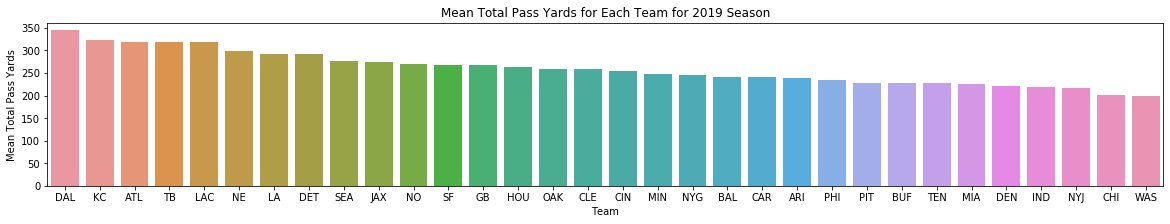

In [9]:
# find total average number of pass yards per game for each team during the season
season_pass_total = pass_data.groupby(['Team', 'Conference', 'Division'])['PassYds'].agg([np.mean])

# sort teams from most to least for average total pass yards
season_pass_total = season_pass_total.sort_values(by=['mean'], ascending=False)

season_pass_total = season_pass_total.rename(columns={"mean": "MeanTotalPassYds"})

# Create bar graph of total average pass yards per game sorted by team 
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(season_pass_total.index.get_level_values('Team'), season_pass_total['MeanTotalPassYds'])
ax.set_xlabel('Team')
ax.set_ylabel('Mean Total Pass Yards')
ax.set_title("Mean Total Pass Yards for Each Team for 2019 Season")

The plots below look at the progression of passing yards per week for each team. The plots are broken up into the 8 divisions in the NFL. Most of the teams seem to have high variation in passing yards from week-to-week. Weeks with lower passing yards could be attributed to facing a stronger opposing defense, poor weather conditions, injuries, and other factors.

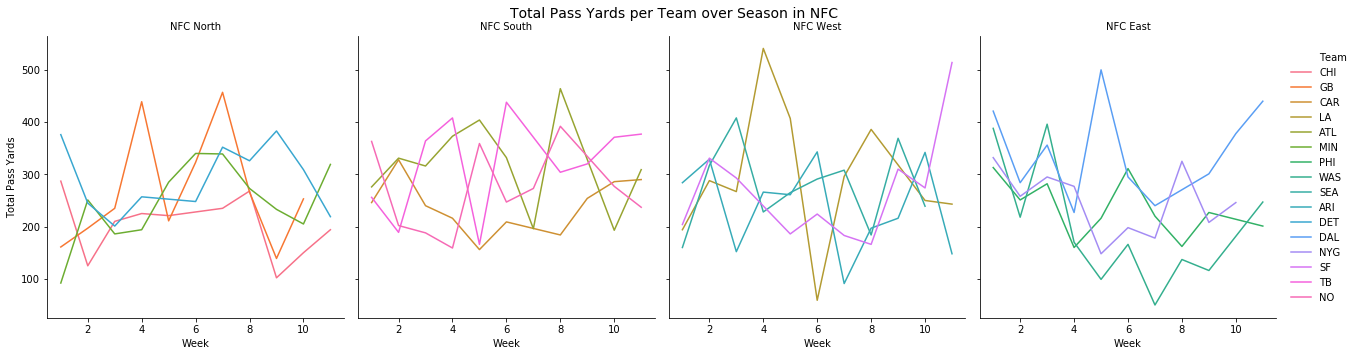

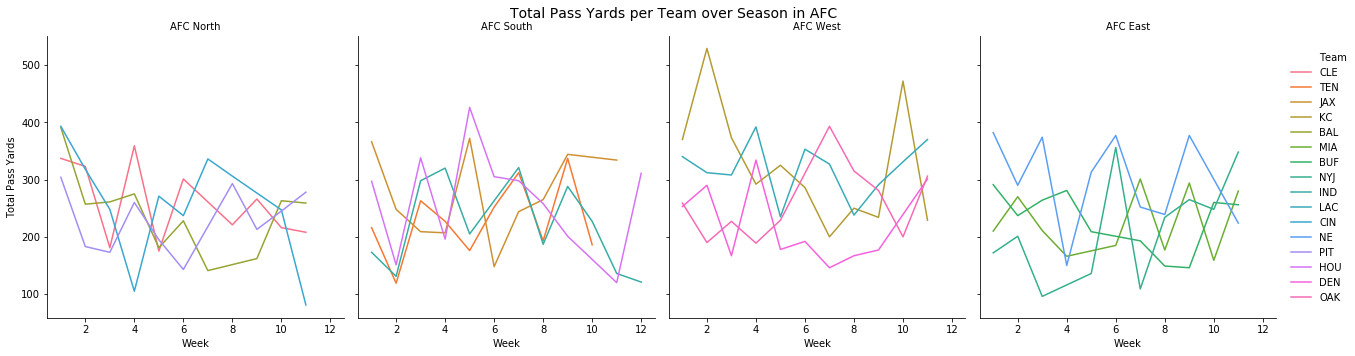

In [10]:
# Plot average total pass yards per game in a scatter plot for each team
# Each scatter plot represents a different division 

conf = season_pass_total.index.get_level_values('Conference').unique()
for c in conf:
    subset_pass_data = pass_data.loc[pass_data['Conference'] == c]
    plots = sns.relplot(x="Week", y="PassYds", hue="Team",col="Division", row="Conference", 
                    height=5, aspect=.9, kind="line", data=subset_pass_data)
    
    # label axes & titles of plots
    plots.set_axis_labels("Week", "Total Pass Yards")
    plots.set_titles('{col_name}')
    plots.fig.suptitle("Total Pass Yards per Team over Season in " + c, size=14)
    plots.fig.subplots_adjust(top=0.9)

### Rushing Yards

Rushing yards is a statistic in football that records the total number of yards gained by a player, where the player carries the football (as opposed to receiving a pass). Like passing yards, rushing yards are also measured from the line of scrimmage to where the the player who ran with the ball was tackled, forced out of bounds, or entered the endzone for a touchdown. Rushing yards can measure the effectiveness of running backs and rushing quarterbacks. Quarterback scrambles are when the quarterback rather than another player carries the ball.

Below, we created a DataFrame with the number of total rush yards for each team in every game. We also added the number of rush yards for each winning and losing team in the differentials dataframe. The 'RushYardsW' column indicates the number of rush yards for the winning team and 'RushYardsL' displays the number of rush yards for the losing team.

In [11]:
# aggregate total rush yards per play for each game for all teams 

differentials['RushYdsW'] = 0
differentials['RushYdsL'] = 0

# find rushing plays in nfl_data
rush_data = nfl_data[(nfl_data['IsRush']==1)]

# find the total rush yards  for each gameId
rush_data = rush_data.groupby(['GameId', 'Week', 'OffenseTeam'])['Yards'].agg([np.sum])

# create columns for team,gameid, and week
rush_data['Team'] = rush_data.index.get_level_values('OffenseTeam')
rush_data['GameId'] = rush_data.index.get_level_values('GameId')
rush_data['Week'] = rush_data.index.get_level_values('Week')

# merge data of team's conference in division into pass_data
rush_data = pd.merge(rush_data, nfl_div, on='Team', how='inner')
rush_data['RushYds'] = rush_data['sum']
rush_data = rush_data.drop(['Name', 'sum'], axis=1)


# add rushing yards for each winning and losing team
for i, row in differentials.iterrows():
    matchW = rush_data[(rush_data['Team'] == row['Winner/tie']) & (rush_data['Week'] == row['Week'])]
    matchL = rush_data[(rush_data['Team'] == row['Loser/tie']) & (rush_data['Week'] == row['Week'])]
    if not matchW.empty:
        differentials.at[i, 'RushYdsW'] = matchW['RushYds'].iloc[0]
    if not matchL.empty:
        differentials.at[i, 'RushYdsL'] = matchL['RushYds'].iloc[0]

differentials.head()

,Week,FormatDate,Winner/tie,Loser/tie,PtsW,PtsL,PassYdsW,PassYdsL,RushYdsW,RushYdsL
0,1,2019-09-05,GB,CHI,10.0,3.0,161,287,54,48
1,1,2019-09-08,MIN,ATL,28.0,12.0,92,276,187,73
2,1,2019-09-08,PHI,WAS,32.0,27.0,313,388,146,42
3,1,2019-09-08,LA,CAR,30.0,27.0,194,246,169,134
4,1,2019-09-08,BAL,MIA,59.0,10.0,391,210,256,21


First, we found the mean rushing yards per game throughout the season for each team. We used a barplot to plot the teams from the highest to lowest in terms of mean passing yards for the season. From this, we can see that the Baltimore Ravens (BAL) had the highest number of mean passing yards with around 200 yards. At about 50 yards per game, Baltimore had a significant lead over the rest of the league. This aligns with the reputation of the Baltimore Ravens, whose quarterback is known for Lamar Jackson, who is one of the league's premier rushing quarterbacks. A rushing quarterback is one that tends to run more than other quarterbacks in the league rather than primarily relying on passing. 

After Baltimore, the next best rushing teams were the San Francisco 49ers (SF), Indianapolis Colts (IND), Minnesota Vikings (MIN), and Houston Tens (HOU).

Text(0.5, 1.0, 'Mean Total Rush Yards for Each Team for 2019 Season')

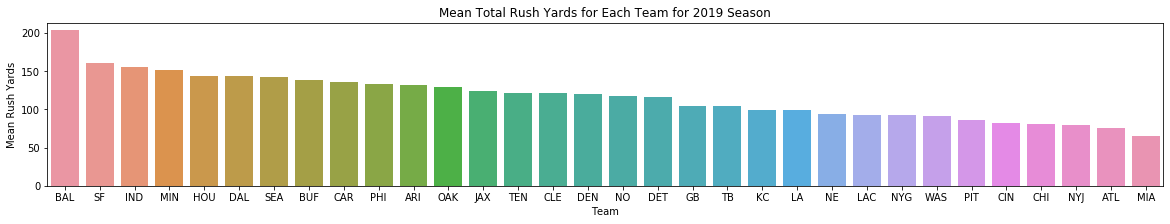

In [12]:
# find total rush yards per team during the whole season
season_rush_total = rush_data.groupby(['Team', 'Conference', 'Division'])['RushYds'].agg([np.mean])

# sort teams from most to least for rush yards
season_rush_total = season_rush_total.sort_values(by=['mean'], ascending=False)

# Create bar graph of total rush averages 
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(season_rush_total.index.get_level_values('Team'), season_rush_total['mean'])
ax.set_xlabel('Team')
ax.set_ylabel('Mean Rush Yards')
ax.set_title("Mean Total Rush Yards for Each Team for 2019 Season")

The plots below look at the progression of rushing yards per week for each team. The plots are broken up into the 8 divisions in the NFL. Similar to passing, the teams had high variation in rushing yards from week-to-week. Weeks with lower rushing yards could also be attributed to facing a stronger opposing defense, injuries, and other factors. Keeping the focus on the Baltimore Ravens, we can see their weekly averages (shown by the gold line in the AFC North line plot) are usually significantly higher than the rest of the teams in the division. 

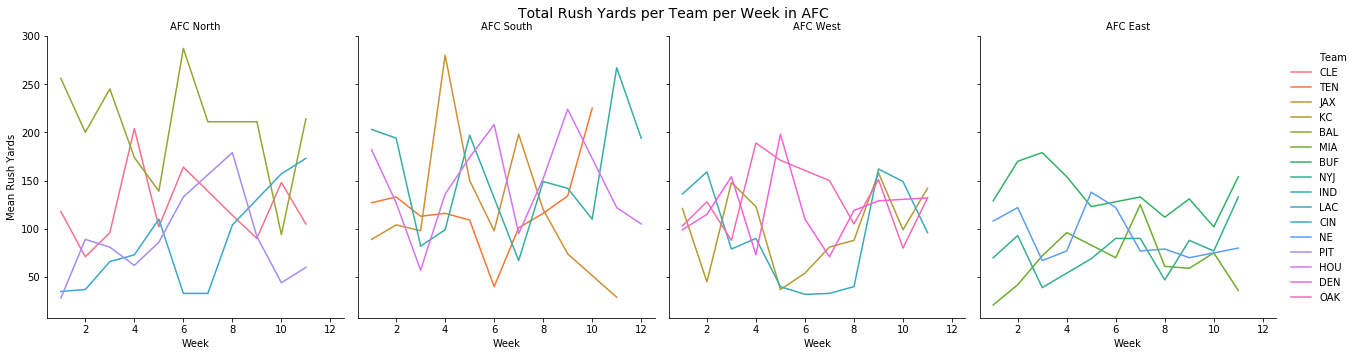

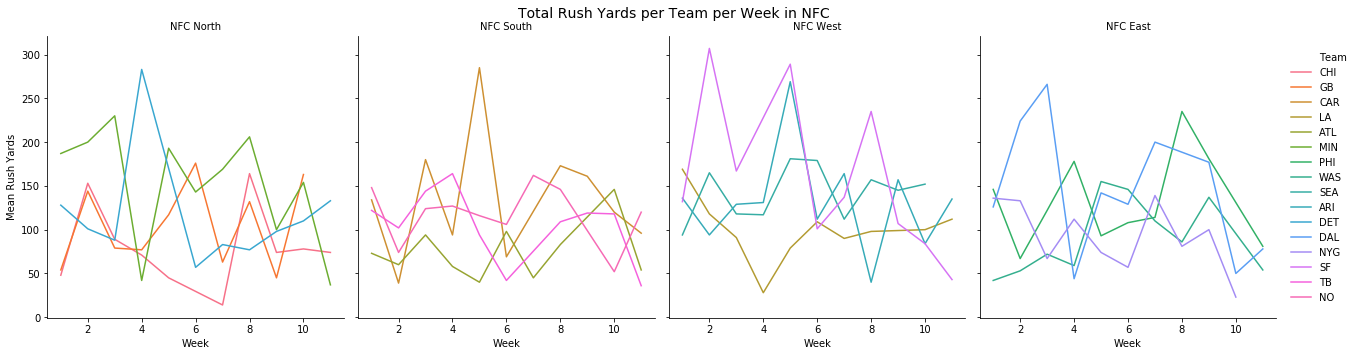

In [13]:
# Plot total rush yards in each game for each team
# Each scatter plot represents a different division 

conf = season_rush_total.index.get_level_values('Conference').unique()
for c in conf:
    subset_rush_data = rush_data.loc[rush_data['Conference'] == c]
    plots = sns.relplot(x="Week", y="RushYds", hue="Team",col="Division", row="Conference", 
                    height=5, aspect=.9, kind="line", data=subset_rush_data)
    
    # label axes & titles of plots
    plots.set_axis_labels("Week", "Mean Rush Yards")
    plots.set_titles('{col_name}')
    plots.fig.suptitle("Total Rush Yards per Team per Week in " + c, size=14)
    plots.fig.subplots_adjust(top=0.9)

### Total Yards

The total number of yards, also called total offense, is a statistic representing the total number of yards rushing and yards passing by a team. 

We created a total yards dataframe that showed total offense. To find total offense, we added togther the team's passing and rushing yards from each game. Then, we updated the differentials dataframe to reflect the total number of yards.

In [14]:
# aggregate total yards per game for all teams
# formula is rushing yards + passing yards 

differentials['TotalYdsW'] = 0
differentials['TotalYdsL'] = 0

# do not include yards if offensive team had a penalty
total_yds_data = pd.merge(pass_data, rush_data, how='inner')

# sum total yards for each gameId
total_yds_data['TotalYds'] = total_yds_data['PassYds'] + total_yds_data['RushYds']

# add total yards for each winning and losing team
for i, row in differentials.iterrows():
    matchW = total_yds_data[(total_yds_data['Team'] == row['Winner/tie']) & (total_yds_data['Week'] == row['Week'])]
    matchL = total_yds_data[(total_yds_data['Team'] == row['Loser/tie']) & (total_yds_data['Week'] == row['Week'])]
    if not matchW.empty:
        differentials.at[i, 'TotalYdsW'] = matchW['TotalYds'].iloc[0]
    if not matchL.empty:
        differentials.at[i, 'TotalYdsL'] = matchL['TotalYds'].iloc[0]

differentials.head()

,Week,FormatDate,Winner/tie,Loser/tie,PtsW,PtsL,PassYdsW,PassYdsL,RushYdsW,RushYdsL,TotalYdsW,TotalYdsL
0,1,2019-09-05,GB,CHI,10.0,3.0,161,287,54,48,215,335
1,1,2019-09-08,MIN,ATL,28.0,12.0,92,276,187,73,279,349
2,1,2019-09-08,PHI,WAS,32.0,27.0,313,388,146,42,459,430
3,1,2019-09-08,LA,CAR,30.0,27.0,194,246,169,134,363,380
4,1,2019-09-08,BAL,MIA,59.0,10.0,391,210,256,21,647,231


First, we found the mean total yards per game throughout of the season for each team. We used a barplot to plot the teams from the highest to lowest in terms of total yards for the season. From this, we can see that the Dallas Cowboys (DAL) had the highest number of yards at under 500 yards followed by the Baltimore Ravens (BAL), San Francisco 49ers (SF), Tampa Bay Buccaneers (TB), and Kansas City Chiefs (KC). This is an interesting bar graph because Dallas, which is ranked first in passing yards, is 6-4 for the season. This is a fairly average record, but by no means indicate that Dallas is one of the best teams in the NFL.

Text(0.5, 1.0, 'Mean Total Yards for Each Team for 2019 Season')

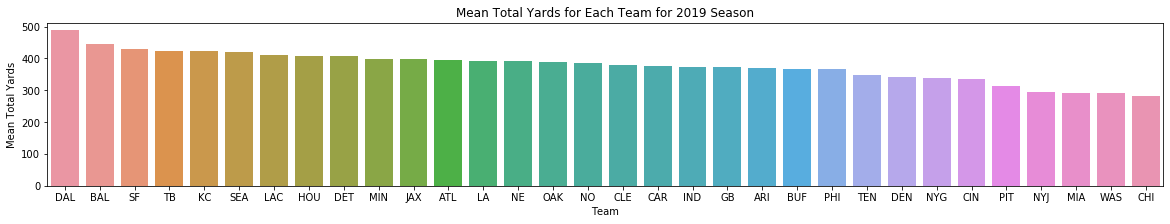

In [15]:
# find mean number of total yards per team during the whole season
season_yds_total = total_yds_data.groupby(['Team', 'Conference', 'Division'])['TotalYds'].agg([np.mean])

# sort teams from most to least for mean total yards
season_yds_total['mean'] = season_yds_total['mean']
season_yds_total = season_yds_total.sort_values(by=['mean'], ascending=False)

# Create bar graph of total yards 
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(season_yds_total.index.get_level_values('Team'), season_yds_total['mean'])
ax.set_xlabel('Team')
ax.set_ylabel('Mean Total Yards')
ax.set_title("Mean Total Yards for Each Team for 2019 Season")

The line plots below look at the progression of total yards per week for each team. The plots are broken up into the 8 divisions in the NFL. Similar to passing, the teams had high variation in total yards from week-to-week. In the NFC East plot, we can see that Dallas (signified by the higher blue line) has a significantly higher number of total yards than their division rivals. Keeping the focus on the Baltimore Ravens, we can see their weekly averages (shown by the gold line in the AFC North line plot) are usually significantly higher than the rest of the teams in the division. Looking at Baltimore in the AFC North, which is indicated by the gold line, we can see that Beltimore produced the most yards early in the season and then were more on par with their division rivals.

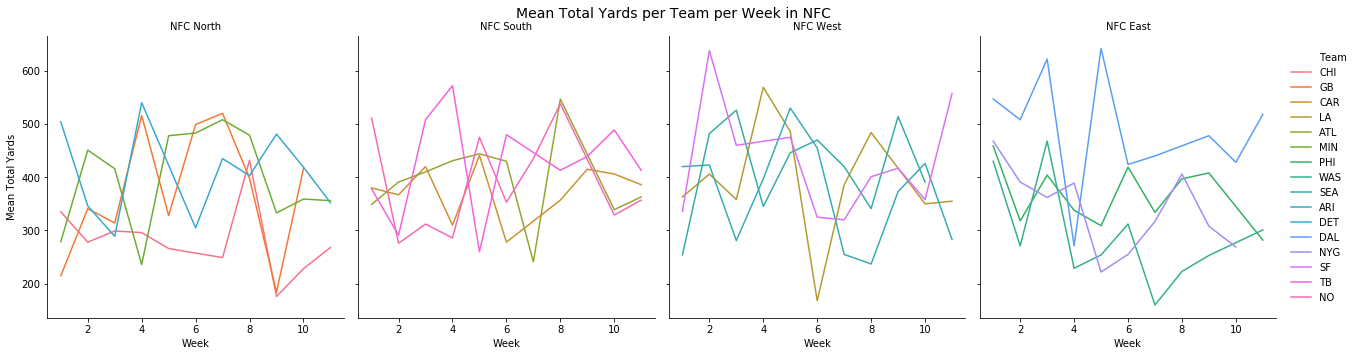

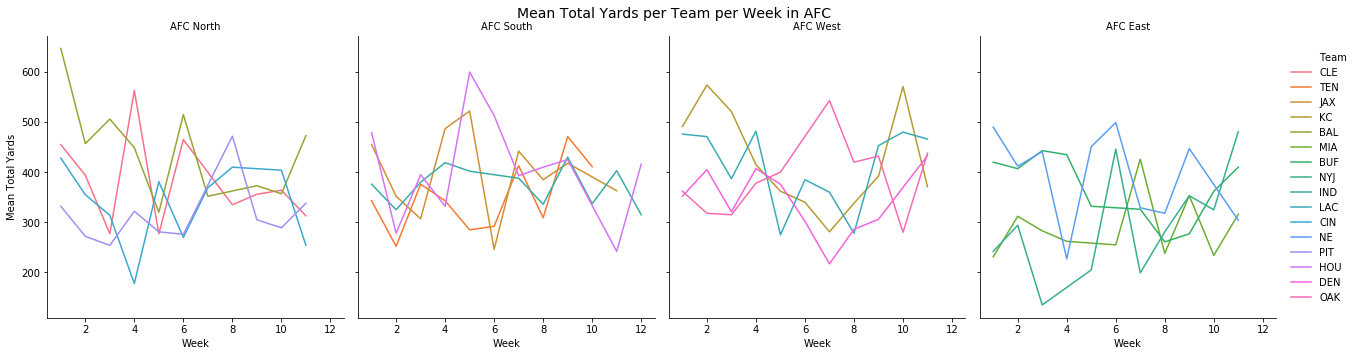

In [16]:
# Plot average total yards in each game for each team
# Each line plot represents a different division 

conf = season_yds_total.index.get_level_values('Conference').unique()
for c in conf:
    subset_total_yds = total_yds_data.loc[total_yds_data['Conference'] == c]
    plots = sns.relplot(x="Week", y="TotalYds", hue="Team",col="Division", row="Conference", 
                    height=5, aspect=.9, kind="line", data=subset_total_yds)
    
    # label axes & titles of plots
    plots.set_axis_labels("Week", "Mean Total Yards")
    plots.set_titles('{col_name}')
    plots.fig.suptitle("Mean Total Yards per Team per Week in " + c, size=14)
    plots.fig.subplots_adjust(top=0.9)

### Third Downs

We then looked into the percentage of third downs converted per team. Converting third downs are very important in football, as this is the last chance the offensive team has to proceed with their drive. Otherwise, usually, the team will punt the ball away to prevent a turnover on the fourth down. To learn more about third down conversions, you can look at this <a href="https://www.sportingcharts.com/dictionary/nfl/third-down-efficiency.aspx">link</a>.

To look at third down efficiency, we calculated number of third downs converted over number of total third downs for each team for the entire season till week 11. 

As you can see, the team for converting is the Baltimore Ravens with almost 50% of their third downs being converted. This team has been doing remarkably well this season, with this statistic only confirming it. The worst teams include Washington Redskins and New York Jets, with about 23%, who have not being doing as well. The differential between these teams is significant and will definitely have an effect on the performance of a team during a game.

             sum  size  PercConverted
OffenseTeam                          
BAL           57   123       0.463415
DAL           58   131       0.442748
OAK           59   134       0.440299
SF            63   155       0.406452
LAC           59   146       0.404110
PHI           62   155       0.400000
IND           64   162       0.395062
NO            56   145       0.386207
KC            58   152       0.381579
NE            59   156       0.378205
DET           56   150       0.373333
HOU           57   156       0.365385
MIN           52   143       0.363636
TB            53   146       0.363014
NYG           53   149       0.355705
SEA           46   134       0.343284
ATL           47   138       0.340580
CIN           50   155       0.322581
GB            41   129       0.317829
ARI           48   152       0.315789
LA            45   146       0.308219
MIA           42   139       0.302158
BUF           43   143       0.300699
CLE           41   139       0.294964
CAR         

Text(0.5, 1.0, 'Percentage of Third Downs Converted Per Team')

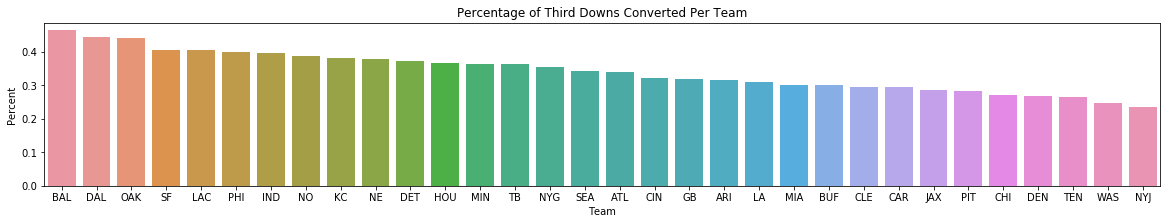

In [17]:
# 3rd down conversions for each team

third_down = nfl_data[nfl_data['Down'] == 3]
third_down = third_down[['OffenseTeam', 'DefenseTeam', 'SeriesFirstDown', 'Yards', 'ToGo', 'IsPenalty', 'PenaltyTeam']]

# create binary converted column with 1 for converted and 0 for not converted
third_down['Converted'] = np.where(third_down['SeriesFirstDown'] == 1, 1, 0)

# create dataframe with number of third downs and number converted
third_down_team = third_down.groupby("OffenseTeam")["Converted"].agg([np.sum, np.size])
third_down_team['PercConverted'] = third_down_team['sum']/third_down_team['size']

third_down_team = third_down_team.sort_values(by=['PercConverted'], ascending=False)
print(third_down_team)
# plot percent of thrid down converted
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(third_down_team.index, third_down_team['PercConverted'])
ax.set_xlabel('Team')
ax.set_ylabel('Percent')
ax.set_title("Percentage of Third Downs Converted Per Team")

### Average Points

The average points a team gets per team is also a significant statistic to look at, as typically the more points one scores, the more likely they are to win.

The teams scoring significantly higher points would include the Baltimore Ravens, who score an average of 33 points and had a 8-2 record by week 11, and San Francisco 49ers, who scores an average of 30 points per game and had a 9-1 record at week 11. In comparison, the lowest-scoring team would be the Washington Redskins, with an average of 12 points and had a record of 1-10 in week 11. Thus, it is evident that the number of points scored corresponds greatly to the number of wins/losses a team had over a season. 

Total yards and third down efficiency above indicated that Dallas was a top-tier team. Therefore, from previous plots  we can see that Dallas is good at moving the ball down the field. However, they ssem to be underperforming at converting these yards into points by getting the ball into the endzone.  

In [18]:
# find average points for each team during season 

# find mean number of points per team during the whole season
season_pts_avg = nfl_gameweek.groupby(['Team'])['Pts'].agg([np.mean])

# sort teams from most to least for mean pts per game
season_pts_avg = season_pts_avg.sort_values(by=['mean'], ascending=False)
season_pts_avg.head()

,mean
Team,
BAL,33.076923
SF,30.538462
TB,29.076923
KC,28.538462
NO,26.461538


Text(0.5, 1.0, 'Total Mean Points Scored for Each Team for Whole Season')

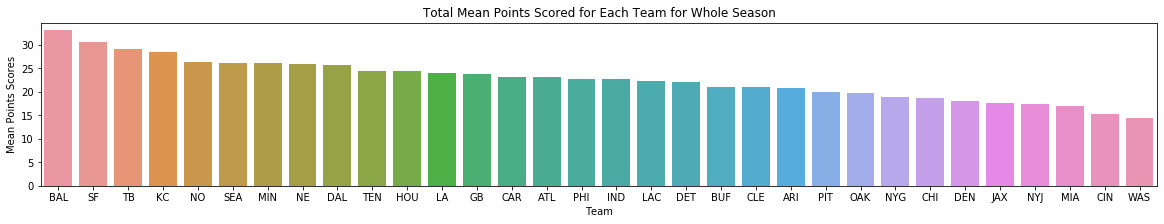

In [19]:
# Create bar graph of mean number of points scored 
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(season_pts_avg.index.get_level_values('Team'), season_pts_avg['mean'])
ax.set_xlabel('Team')
ax.set_ylabel('Mean Points Scores')
ax.set_title("Total Mean Points Scored for Each Team for Whole Season")

### Touchdowns

We then looked at the number of touchdowns, since each touchdown gains a team six points in a game and is the highest scoring play in football. Thus, the more touchdowns a team is able to get, the better their chances are at winning the game. 

Again, one of the teams with the highest number of touchdowns is the Baltimore Ravens, with 42 touchdowns, versus again the Washington Redskins, with 13 touchdowns. Considering their records so far, with Baltimore boasting one of the best records and Washington one of the worst, this makes sense.

Text(0.5, 1.0, 'Touchdowns Per Team')

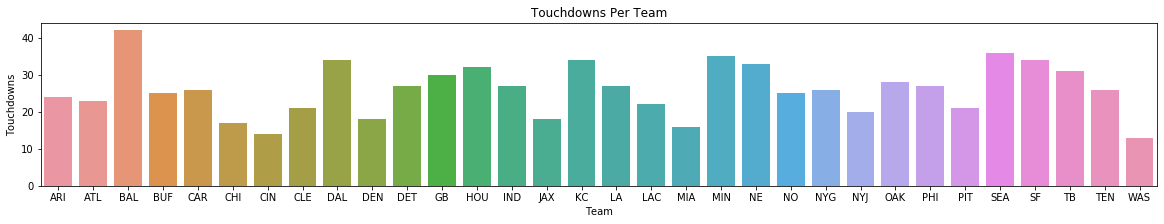

In [20]:
# see which teams score the most touchdowns 

# create dataframe for plays that result in touchdown and keep relevant columns
touchdown_df = nfl_data[nfl_data['IsTouchdown'] == 1]
touchdown_df = touchdown_df.loc[:, touchdown_df.columns.intersection(['GameId','OffenseTeam', 'DefenseTeam', 
                                                                      'Description', 'IsInterception', 'IsFumble'])]

# intialize map of teams with number of touchdowns
team_td = dict.fromkeys(sorted(nfl_div['Team'].unique()), 0)

# increment team_td with number of touchdowns team scored
for index, row in touchdown_df.iterrows():    
    # not a touchdown because play was reversed (could be because of penalty)
    if 'REVERSE' in row['Description'] or 'NULLIFIED' in row['Description']:
        pass
    elif row['IsInterception'] == 1 or 'PUNT IS BLOCKED'in row['Description']:
        team = row['DefenseTeam']
        val = team_td.get(team)
        team_td[team] = val + 1
    # check if fumble is recovered by offense or defense
    elif row['IsFumble'] == 1:
        team = row['Description'].partition('RECOVERED BY ')[2]
        team = team.split('-')[0]
        if row['OffenseTeam'] == team:
            team = row['OffenseTeam']
            val = team_td.get(team)
            team_td[team] = val + 1
        else:
            team = row['DefenseTeam']
            val = team_td.get(team)
            team_td[team] = val + 1
    # a normal offensive touchdown
    else:
        team = row['OffenseTeam']
        val = team_td.get(team)
        team_td[team] = val + 1

# plot touchdowns 
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(list(team_td.keys()), list(team_td.values()))
ax.set_xlabel('Team')
ax.set_ylabel('Touchdowns')
ax.set_title("Touchdowns Per Team")

### Field Goals

Field goals are the second highest scoring play in football, with each field goal getting the team three points. Thus, knowing how well teams are able to make field goals is an important consideration.

To calculate number of field goals made, we merged our dataset with another dataset by using matching records based on date, teams, quarter, and time and added a column to our main one with values populated for every field goal play. 

In [21]:
nfl_data['IsFieldGoalMade'] = np.nan
field_goal = nfl_data.copy()
field_goal = field_goal[['GameDate', 'Quarter', 'OffenseTeam', 'DefenseTeam', 'Down', 'PlayType', 'Minute', 'Second', 
                         'IsFieldGoalMade']]
#gets all plays that were field goals
field_goal = field_goal[field_goal['PlayType'] == 'FIELD GOAL']
nfl_data2['minute'] = nfl_data2.apply(lambda row: int(row.time.split(":")[0]), axis=1)
nfl_data2['second'] = nfl_data2.apply(lambda row: int(row.time.split(":")[1]), axis=1)

for i, row in field_goal.iterrows():
    #obtains the matching record from the dataset
    match = nfl_data2[(nfl_data2['game_date'] == row['GameDate']) & 
                      (nfl_data2['posteam'] == row['OffenseTeam']) & (nfl_data2['defteam'] == row['DefenseTeam']) &
                     (nfl_data2['qtr'] == row['Quarter']) & (nfl_data2['minute'] == row['Minute']) &
                     (nfl_data2['second'] <= row['Second'] + 10) & (nfl_data2['second'] >= row['Second'] - 10)]
    #if no match, juwst keeps column as NaN
    if match.empty:
        nfl_data.at[i, 'IsFieldGoalMade'] = np.nan
    #if the result is 'made', then the value inside the column is set to 1
    elif match['field_goal_result'].iloc[0] == 'made':
        nfl_data.at[i, 'IsFieldGoalMade'] = 1.0
    #if the result is 'missed', the value is set to 0
    else:
        nfl_data.at[i, 'IsFieldGoalMade'] = 0.0
nfl_data[nfl_data['PlayType'] == 'FIELD GOAL'].head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsFumble,IsPenalty,YardLineFixed,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Week,IsFieldGoalMade
69,2019111010,2019-11-10,1,12,8,DAL,MIN,4,6,61,...,0,0,39,0,NaN,0,NaN,0,10,0.0
110,2019111400,2019-11-14,1,7,52,PIT,CLE,4,3,74,...,0,0,26,0,NaN,0,NaN,0,11,0.0
143,2019111703,2019-11-17,4,14,57,JAX,IND,4,9,72,...,0,0,28,0,NaN,0,NaN,0,11,0.0
147,2019111800,2019-11-18,1,4,41,LAC,KC,4,5,78,...,0,1,22,1,KC,0,UNNECESSARY ROUGHNESS,15,11,0.0
166,2019111710,2019-11-17,1,13,42,PHI,NE,4,8,76,...,0,0,24,0,NaN,0,NaN,0,11,1.0


While a field goal can be kicked from any range; the furthur you get away from the goal, typically the harder it is to score field goal. Typically, teams do not kick field goals from outside the midfield (or the 50 yard line). Usually, though, most field goals are kicked from the fifteen to thirty yard line. So, for our analysis, we looked at number of field goals made over total number of field goals for different ranges for each team. The ranges we considered were 1 - 20, 21 - 30, 31 - 40, and 41 - 50. We also included the total conversion rate for each team. 

The Arizona Cardinals and Kansas City Chiefs are the ones with the most number of field goals attempted and decent at being able to make them in. This does not correspond as well to the overall record for the season as the Cardinals were at 3-7-1 in week 11 and the Chiefs were 7-4. 

Considering field goals do not have as big of an impact on overall score as touchdowns, since they are half the number of points, it makes sense that the best teams this season are not up there. Another consideration is that teams usually go for field goals if they are unable to make touchdowns. Thus, if a team has a lot of field goal attempts, it most likely corresponds to a lack of touchdowns since they were unable to follow through on a drive for a touchdown and thus had to settle for a field goal. 

In [22]:
# calculates number of field goals made for each range for each team

field_goal = nfl_data[nfl_data['IsFieldGoalMade'].notnull()]
field_goal = field_goal[['OffenseTeam', 'YardLineFixed', 'IsFieldGoalMade']]
teams = field_goal['OffenseTeam'].drop_duplicates()
field_goal_statistics = pd.DataFrame(columns=['Team', '(0, 20]', '(20, 30]', '(30, 40]', '(40, 50]', 'Total'])
field_goal_heatmap_data = field_goal_statistics.copy()
i = 0
bins = [0, 20, 30, 40, 50, 100]
for x in teams:
    goals = field_goal[field_goal['OffenseTeam'] == x]
    goals['group'] = pd.cut(goals["YardLineFixed"], bins)
    field_goal_statistics.at[i, 'Team'] = x
    field_goal_statistics.at[i, 'Total'] = (len(goals[goals['IsFieldGoalMade'] == 1.0]), len(goals))
    field_goal_heatmap_data.at[i, 'Team'] = x
    field_goal_heatmap_data.at[i, 'Total'] = len(goals[goals['IsFieldGoalMade'] == 1.0]) / len(goals)
    for y in goals['group'].drop_duplicates():
        bin_goals = goals[goals['group'] == y]
        #create tuple of (number of field goals made, total number of field goals)
        field_goal_statistics.at[i, str(y)] = (len(bin_goals[bin_goals['IsFieldGoalMade'] == 1.0]), len(bin_goals))
        field_goal_heatmap_data.at[i, str(y)] = len(bin_goals[bin_goals['IsFieldGoalMade'] == 1.0]) / len(bin_goals)
    i = i + 1
field_goal_statistics = field_goal_statistics.applymap(lambda x: (0,0) if x is np.nan else x)
field_goal_heatmap_data = field_goal_heatmap_data.fillna(0)
field_goal_statistics = field_goal_statistics.sort_values(by=['Total'], ascending=False)
field_goal_statistics.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Team,"(0, 20]","(20, 30]","(30, 40]","(40, 50]",Total
26,ARI,"(19, 20)","(5, 7)","(2, 2)","(0, 0)","(26, 29)"
14,KC,"(12, 13)","(11, 11)","(1, 4)","(0, 0)","(24, 28)"
2,JAX,"(17, 17)","(5, 6)","(0, 0)","(0, 0)","(22, 23)"
3,LAC,"(10, 10)","(8, 15)","(3, 3)","(0, 0)","(21, 28)"
19,NO,"(12, 12)","(7, 9)","(2, 4)","(0, 0)","(21, 25)"


The heatmap shows the percentage of field goals made in every 10-yard interval for each team. The numbers closer to 1 indicate a higher percentage of field goals made in the 10-yard range. The Dallas Cowboys (DAL), from the heatmap, was can see that thet have lower than average percentages. This could be why Dallas, despite the high yards gained, had a lower number of points scored. In addition, the Baltimore Ravens (BAL) seemed to have higher percentages from every range than other teams. Baltimore was leading average number of points, so high field goal percentages feed into this as well.

(32.0, 0.0)

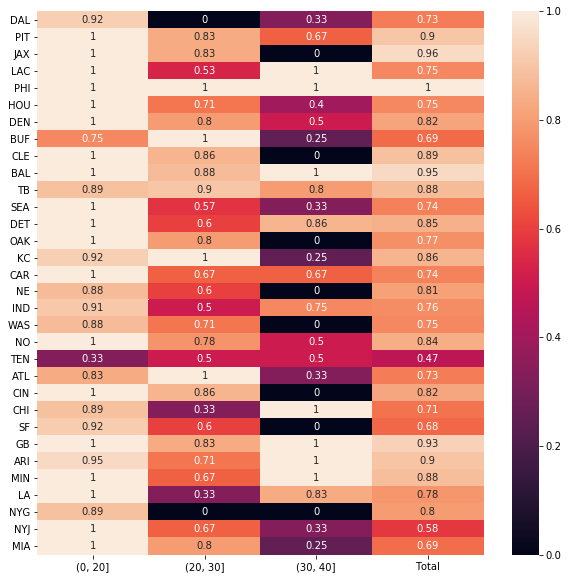

In [23]:
teams = field_goal_heatmap_data['Team']

#drop 40-50 range since most of them are zeros
field_goal_heatmap_data = field_goal_heatmap_data.drop(['Team', '(40, 50]'], axis=1)
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(field_goal_heatmap_data, annot=True, yticklabels=teams, ax = ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Interceptions

Interceptions occur when the offense team throws the ball and the defense team catches it. This leads to an automatic turnover from wherever the defensive player was stopped and could potentially change the tide of the game, depending on how close to the end zone the team is. 

Interceptions are not very common as we can see since the average number of interceptions for a team is about 10 over 11 weeks. The one with the most at 20 interceptions, Tampa Bay Buccaneers, have a record of 3-7 in week 11 and the second most at 15, LA Chargers, has a record of 4-7 in week 11, both being less than stellar records. The ones with the least interceptions are the Green Bay Packers, who had 10 wins and 2 losses at this point in the season. But, interceptions don't hold a much value since Arizona Cardinals, with the 3rd least number of interceptions have a record of 3-7-1 in week 11. 

Text(0.5, 1.0, 'Number Of Interceptions Thrown Per Team')

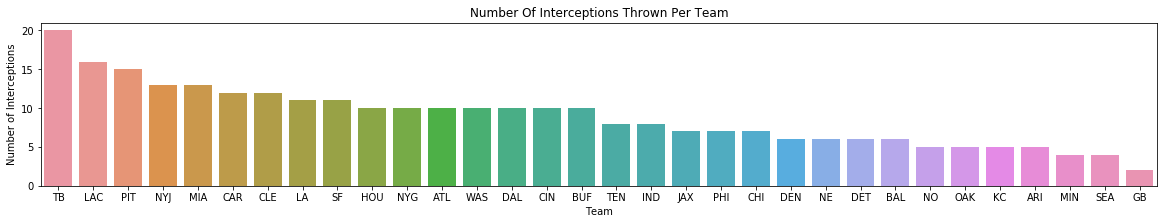

In [24]:
# number of interceptions per team

# create dataframe for plays that result in interception and keep relevant columns
interceptions = nfl_data.copy()[nfl_data['IsInterception'] == 1]
interceptions = interceptions.loc[:, interceptions.columns.intersection(['OffenseTeam', 'IsInterception'])]

ints_per_team = interceptions.groupby("OffenseTeam")["IsInterception"].agg([np.sum])

ints_per_team = ints_per_team.sort_values(by=['sum'], ascending=False)

# plot internceptions
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(ints_per_team.index, ints_per_team['sum'])
ax.set_xlabel('Team')
ax.set_ylabel('Number of Interceptions')
ax.set_title("Number Of Interceptions Thrown Per Team")

### Fumbles

Fumbles occur when the person carrying the ball is unable to keep a hold of it. Either team is able to get the ball when it has been fumbled and thus it is important to not only look at how many fumbles teams make but also how many teams are able to successfully recover the fumble. 

We were able to aggregate the number of fumbles for each team and look at which team recovered it. We then plotted for each team the differential between the number of fumbles recovered and the total number of fumbles throughout the season.

By looking at the total number of fumbles, we can see that the New York Giants (NYG) produced over 20 fumbles. The Minnesota Vikings (MIN) and Seattle Seahawks (SEA) were had the next highest number of fumbles. These two teams are two of the better teams in the NFL with 8-3 and 8-2, respectively.

Text(0.5, 1.0, 'Number Of Fumbles Thrown Per Team')

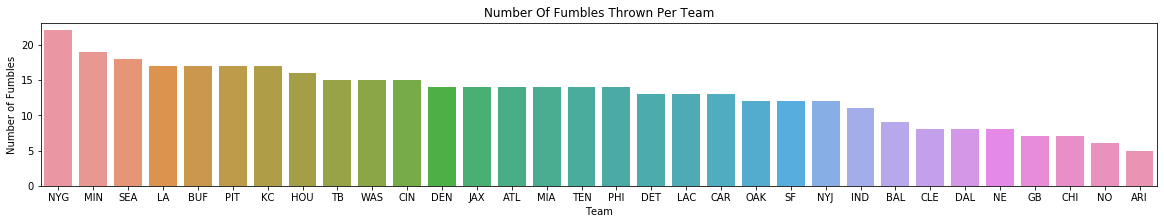

In [25]:
#number of fumbles per team

# create dataframe for plays that result in fumbles and keep relevant columns
fumbles = nfl_data.copy()[nfl_data['IsFumble'] == 1]
fumbles = fumbles.loc[:, fumbles.columns.intersection(['OffenseTeam', 'Description', 'IsFumble'])]
fumbles_data = fumbles.groupby("OffenseTeam")["IsFumble"].agg([np.sum])

# rename sum column, add team column from index, and set index to a list of numbers
fumbles_data = fumbles_data.rename(columns={"sum": "TotalFumbles"})
fumbles_data.insert(0, 'Team', fumbles_data.index.get_level_values('OffenseTeam'))
fumbles_data = fumbles_data.set_index(np.arange(0, len(fumbles_data), 1))
fumbles_data = fumbles_data.sort_values(by=['TotalFumbles'], ascending=False)

# plot fumbles
fig, ax = plt.subplots(figsize=(20,3))
sns.barplot(fumbles_data['Team'], fumbles_data['TotalFumbles'])
ax.set_xlabel('Team')
ax.set_ylabel('Number of Fumbles')
ax.set_title("Number Of Fumbles Thrown Per Team")

The plot below shows the difference between the number of fumbles and fumbles recovered. One of the biggest differentials would be only 4 out of 22 fumbles recovered, which is the statistic for the New York Giants, who had 2 wins and 8 losses by week 11. 

On the other hand, one of the smallest differentials would be for the New England Patriots(9-1) with 4 out 8 fumbles recovered. Still, even if you don't have many fumbles/recover most of them, it doesn't mean you play well, as is the case with Arizona Cardinals who had 5 fumbles and recovered 2 of them but still didn't have a great record at this point in the season.

Text(0.5, 1.0, 'Comparison of Recovered and Total Fumbles')

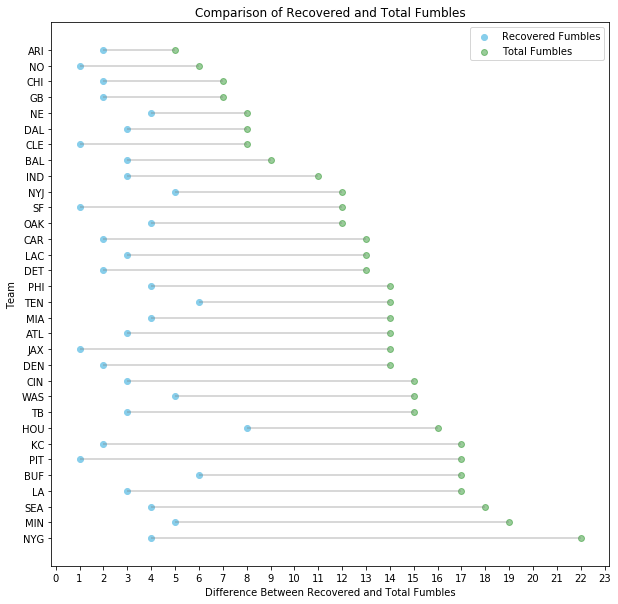

In [26]:
#add number of fumbles recovered per team and percent of recovered fumbles to dataset

fumbles_recovered = fumbles[(fumbles['Description'].str.contains("RECOVERS AT") == True) | 
                            (fumbles['Description'].str.contains("OUT OF BOUNDS") == True)]
fum_recovered = fumbles_recovered.groupby("OffenseTeam")["IsFumble"].agg([np.sum])

# rename sum column, add team column from index, and set index to a list of numbers
fum_recovered = fum_recovered.rename(columns={"sum": "Recovered"})
fum_recovered.insert(0, 'Team', fum_recovered.index.get_level_values('OffenseTeam'))
fum_recovered = fum_recovered.set_index(np.arange(0, len(fum_recovered), 1))

fumbles_data = pd.merge(fumbles_data, fum_recovered)

# add percent of fumbles recovered for each team to fumbles_data
fumbles_data['NotRecovered'] = fumbles_data['TotalFumbles'] - fumbles_data['Recovered']
fumbles_data['PercRecovered'] = fumbles_data['Recovered'] / fumbles_data['TotalFumbles']

# plot with team on y-axis
# x-axis is number of fumbles recovered with the blue dot extending to total fumbles with the green dot
fig, ax = plt.subplots(figsize=(10, 10))
my_range = range(0, 32)
plt.hlines(y=my_range, xmin=fumbles_data['Recovered'], xmax=fumbles_data['TotalFumbles'], color='grey', alpha=0.4)
plt.scatter(fumbles_data['Recovered'], my_range, color='skyblue', alpha=1, label='Recovered Fumbles')
plt.scatter(fumbles_data['TotalFumbles'], my_range, color='green', alpha=0.4 , label='Total Fumbles')
plt.legend()

# Add title and axis names
plt.yticks(my_range, fumbles_data['Team'])
plt.xticks(range(0, 24, 1))
plt.xlabel('Difference Between Recovered and Total Fumbles')
plt.ylabel('Team')
plt.title("Comparison of Recovered and Total Fumbles")

### Penalties

Another part of NFL that tends to have an effect in games are penalties. As a result of these, offensive teams can lose anywhere from 5 to 20 yards, making it harder for them to get a first down, and defensive penalties typically result in an automatic first down for the offensive team, making it easier for them on their drive. 

We were able to plot the number of total penalties per team and then also split it up by offensive and defensive for each team. Most teams average about 80 penalties total so far this season. In general, a team tends to have more offensive than defensive penalties but they are usually about the same for each team. Two exceptions to this would be the Oakland Raiders, who have about 60 defensive penalties and 35 offensive penalties, and the Green Bay Packers, who have 50 offensive penalties but only 20 defensive penalties. While certain calls made by referees that lead to penalties may affect games between evenly-matched teams, it doesn't necessarily help with a team's performance throughout the season. The Cincinnati Bengals have the least number of overall penalties, but still had a record of 0-10 in week 11. 

While penalties do not seem to affect game outcomes, analytics on penalties can help teams see whether their offense or defense is being penalizied more. Minimizing penalties can minimize loss of yards, so seeing who is committing the penalties will help to minimize them. 

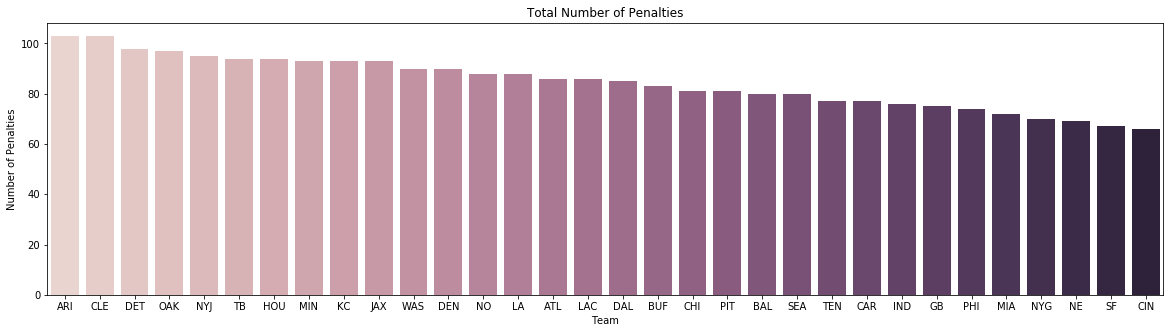

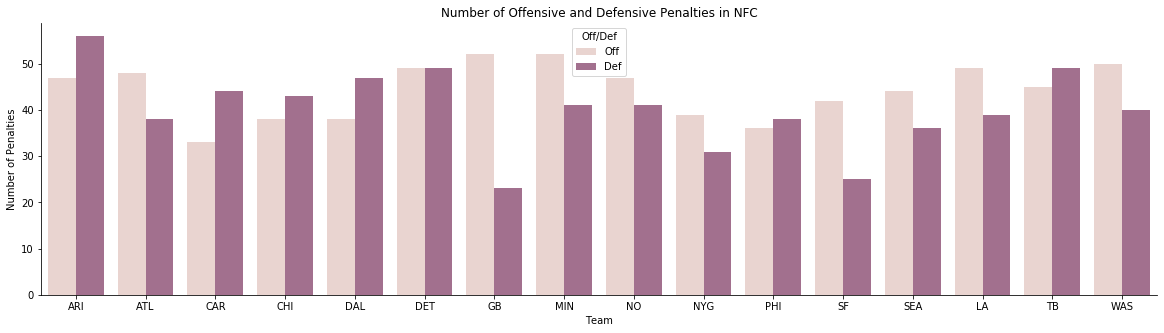

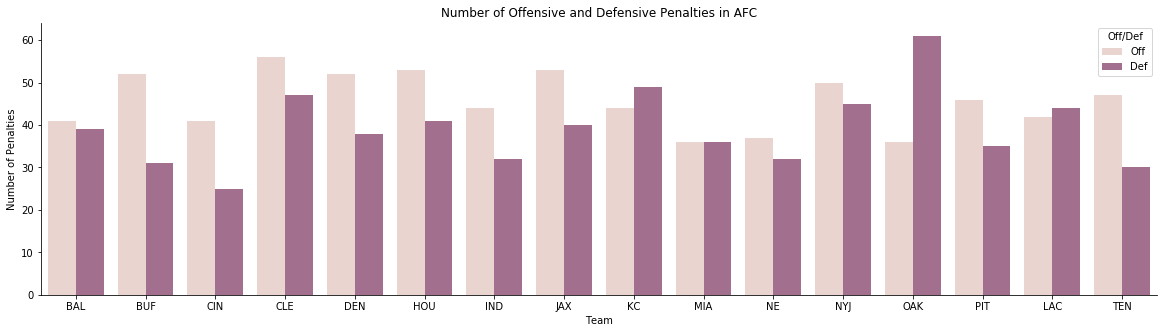

In [27]:
# find number of offensive and defensive penalties

penalties = nfl_data.copy()
penalties = penalties[penalties['IsPenalty'] == 1]
drop_cols = ['IsPenalty','IsInterception', 'IsFumble', 'IsPenalty', 'YardLineFixed', 'Yards', 
             'IsRush', 'IsPass', 'IsTouchdown', 'Description', 'SeriesFirstDown']
penalties = penalties.drop(drop_cols, axis=1)

offensive_pen = dict.fromkeys(nfl_div['Team'].unique(), 0)
defensive_pen = dict.fromkeys(nfl_div['Team'].unique(), 0)
    
# add number of penalties for defense and offense
for index, row in penalties.iterrows():
    if (row['OffenseTeam'] == row['PenaltyTeam']):
        team = row['OffenseTeam']
        count = offensive_pen[team]
        offensive_pen[team] = count + 1
    else:
        team = row['DefenseTeam']
        count = defensive_pen[team]
        defensive_pen[team] = count + 1

# create offensive dataframe with penalty counts 
penalty_count_off = pd.DataFrame(index = range(len(offensive_pen))) 
penalty_count_off['Team'] = offensive_pen.keys()
# penalty_count_off = pd.merge(penalty_count_off, nfl_div, on='Team', how='inner')
penalty_count_off = penalty_count_off.merge(nfl_div[['Team', 'Conference']], on='Team', how='inner')
penalty_count_off['Off/Def'] = 'Off'
penalty_count_off['PenaltyCount'] = penalty_count_off['Team'].apply(lambda x: offensive_pen.get(x))

# create defensive dataframe with penalty counts 
penalty_count_def = pd.DataFrame(index = range(len(defensive_pen)))
penalty_count_def['Team'] = defensive_pen.keys()
penalty_count_def = penalty_count_def.merge(nfl_div[['Team', 'Conference']], on='Team', how='inner')
penalty_count_def['Off/Def'] = 'Def'
penalty_count_def['PenaltyCount'] = penalty_count_def['Team'].apply(lambda x: defensive_pen.get(x))

# concat dataframes to contain both offensive and defensive penalty counts
penalties = pd.concat([penalty_count_off, penalty_count_def]).reset_index(drop=True)

# find total number of penalties for each team
total_pen = penalties.groupby('Team')['PenaltyCount'].agg([np.sum])
total_pen['Team'] = total_pen.index.get_level_values('Team')
total_pen = total_pen.sort_values(by=['sum'], ascending=False)

# plot total number of penalties
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Team', y='sum', palette=sns.cubehelix_palette(32), data=total_pen)
ax.set_ylabel('Number of Penalties')
ax.title.set_text('Total Number of Penalties')

# plot
conf = penalties['Conference'].unique()
for c in conf:
    subset_penalty_data = penalties.loc[penalties['Conference'] == c]
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.barplot(x='Team', y='PenaltyCount', hue='Off/Def', palette=sns.cubehelix_palette(3), data=subset_penalty_data)
    sns.despine(fig)
    
    # label axes & titles of plots
    ax.set_ylabel('Number of Penalties')
    ax.title.set_text('Number of Offensive and Defensive Penalties in ' + c)

## Finding Trends with Machine Learning
   
   For finding trends, we focused on two different aspects of NFL football. Our first trend was looking at the impact of team and yardage on whether or not a team is able to make a field goal. This is important since teams could use this to see where they are more likely to miss a field goal and improve their kickers subsequently. The other aspect we look at was trends between rushing and passing yards and points one obtains by the end of the game. From our analysis, we can see that those two had the biggest impact on a team's record this season, in comparison to the other aspects such as third down conversions, interceptions, fumbles, etc. Thus, we looked to see if we could predict whether or not a team would win a game based on the rushing/passing yards they had during that game.

### Field Goals
    
   For field goals, we created one hot encodings for all 32 teams and used those inputs along with the yard line the team has to make the field goal from to predict whether or not the field goal is made. For this, we used a decision tree since the output is a Boolean classifications, with either a positive(made) or negative(missed) result for the field goal attempt. 
    
   Our decision tree came out to be 80% accurate when we cross validated against our input data. When we looked closer at the predicted values versus actual values, the model predicted that they would make a field goal when they didn't 113 times, thus bringing our recall for missed field goals significantly down. This is most likely due to the with an accumulation of all the field goal plays data, teams tend to make field goals more than they miss up to a certain range, no matter what team it is, and thus the model was able to come to the same generalization and predicts teams would make field goals when they don't. 

In [28]:
field_goal = nfl_data[nfl_data['IsFieldGoalMade'].notnull()]
field_goal = field_goal[['OffenseTeam', 'YardLineFixed', 'IsFieldGoalMade']]
#creates one hot encodings for all the teams
field_goal = pd.get_dummies(field_goal, columns=['OffenseTeam'])
X = field_goal[field_goal.columns.difference(['IsFieldGoalMade'])]
Y = field_goal['IsFieldGoalMade'].values.reshape(-1, 1)

#cross validation for decision tree
#hyper parameter tuning for decision tree - selecting best max_depth
depths = [x for x in range(1,32)]
cv_scores = []
for x in depths:
    dtc = tree.DecisionTreeClassifier(max_depth=x)
    scores = cross_val_score(dtc, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
max_score = max(cv_scores)
max_index = cv_scores.index(max_score)
depth = depths[max_index]

#fits data to a decision tree model and cross validates it to obtain accuracy of our model
clf = tree.DecisionTreeClassifier(max_depth=depth)
clf = clf.fit(X, Y)
Y_decision_tree = clf.predict(X)
field_goal['PredictedFieldGoal'] = Y_decision_tree
tree_scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
print("Accuracy of Decision Tree: " + str(tree_scores.mean()))
print("Error of Decision Tree: " + str(1 - tree_scores.mean()))
print("Standard Deviation of Error: " + str(np.std(1 - tree_scores)))

print(len(field_goal[field_goal['PredictedFieldGoal'] == 1]))

#creates a confusion matric of the decision tree to look into precision and recall
cm = confusion_matrix(Y, Y_decision_tree)
cf_data = pd.DataFrame(cm)
cf_data = cf_data.rename(index={0: "ActualMissedFieldGoal", 1: "ActualMadeFieldGoal"}, 
                         columns={0: "PredMissedFieldGoal", 1: "PredMadeFieldGoal"})
cf_data.head()

Accuracy of Decision Tree: 0.8023201484895033
Error of Decision Tree: 0.19767985151049672
Standard Deviation of Error: 0.028170988536037722
608


,PredMissedFieldGoal,PredMadeFieldGoal
ActualMissedFieldGoal,13,113
ActualMadeFieldGoal,6,495


### Predicting Winner Between 2 Teams

For predicting a winner between two teams, we looked in to multiple linear regression between rushing/passing yards, which we saw being most important from our analysis, and points a team obtains during a game. Then, we matched up various teams and obtained points they would score in the game and compare to see who would have won that game. 

To be able to use this data, we melted our data so that each team was on one row for each week to see the number of rushing and passing yards they got over the course of the game and the subsequent number of points. 

In [29]:
differentials['GameNum'] = range(len(differentials))
differentials_melt = pd.melt(differentials, id_vars=['GameNum', 'FormatDate', 'Week', 'PtsW', 'PtsL', 'PassYdsW', 
            'PassYdsL', 'RushYdsW', 'RushYdsL', 'TotalYdsW', 'TotalYdsL'], value_vars=['Winner/tie', 'Loser/tie'])

# drop data with 0s and nan
differentials_melt = differentials_melt.dropna()
differentials_melt.drop(differentials_melt[(differentials_melt['PassYdsW'] == 0)].index , inplace=True)

# keep relevant stats for team 
differentials_melt['Pts'] = np.where(differentials_melt['variable'] == 'Winner/tie', 
                                     differentials_melt['PtsW'], differentials_melt['PtsL'])
differentials_melt['TotalYds'] = np.where(differentials_melt['variable'] == 'Winner/tie', 
                                     differentials_melt['TotalYdsW'], differentials_melt['TotalYdsL'])
differentials_melt['RushYds'] = np.where(differentials_melt['variable'] == 'Winner/tie', 
                                     differentials_melt['RushYdsW'], differentials_melt['RushYdsL'])
differentials_melt['PassYds'] = np.where(differentials_melt['variable'] == 'Winner/tie', 
                                     differentials_melt['PassYdsW'], differentials_melt['PassYdsL'])

differentials_melt['Winner/Loser'] = differentials_melt['variable']
differentials_melt['Team'] = differentials_melt['value']
differentials_melt = differentials_melt[['GameNum', 'FormatDate', 'Week', 'Winner/Loser', 'Team', 'Pts',
                                        'TotalYds', 'PassYds', 'RushYds']]

differentials_melt.head()

,GameNum,FormatDate,Week,Winner/Loser,Team,Pts,TotalYds,PassYds,RushYds
0,0,2019-09-05,1,Winner/tie,GB,10.0,215,161,54
1,1,2019-09-08,1,Winner/tie,MIN,28.0,279,92,187
2,2,2019-09-08,1,Winner/tie,PHI,32.0,459,313,146
3,3,2019-09-08,1,Winner/tie,LA,30.0,363,194,169
4,4,2019-09-08,1,Winner/tie,BAL,59.0,647,391,256


### Null Hypothesis

Our null hypothesis is that <b>neither rushing yards nor passing yards has an impact on points a team gets in a game </b>.

We used multiple linear regression to fit a linear model to our input of passing and rushing yards and output of points. Each coefficient is about the same and shows that both have a similar impact on points. 

In [31]:
# use pass yards and rush yards as inputs and points as output
X = differentials_melt[['PassYds', 'RushYds']]
Y = differentials_melt['Pts']

# fit linear regression
regr = linear_model.LinearRegression()
regr.fit(X,Y)

# find coefficient and intercept of linear regression between points and total yards
attrs = ['PassYds', 'RushYds']
coeffs = regr.coef_.tolist()
for attr, coef in zip(attrs, coeffs):
    print("Coefficient of {}: {}".format(attr,coef))
    
print("Intercept: " + str(regr.intercept_))

Coefficient of PassYds: 0.05451827195255561
Coefficient of RushYds: 0.08324234478108596
Intercept: -1.4090593033585534


To see whether or not we can reject the null hypothesis, we conducted a t-test to obtain the p-values for each coefficient. To do this, we used an Ordinary Least Squares model, which minimizes the sum of squared differences between the observed and predicted values. It uses these differences to find the best parameters for the model. 

From the results below, we can see both p-values for the two coefficients are well below 0.05, making them statistically significant and allowing us to reject the null hypothesis.

In [32]:
# use Ordinary Least Squares
OLS_model = sm.OLS(Y,X).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pts   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              1372.
Date:                Mon, 16 Dec 2019   Prob (F-statistic):                   6.75e-159
Time:                        15:35:39   Log-Likelihood:                         -1140.6
No. Observations:                 326   AIC:                                      2285.
Df Residuals:                     324   BIC:                                      2293.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PassYds        0.0512      0.003     17.273      0.000       0.045       0.057
RushYds        0.0793      0.006     12.676      0.000       0.067       0.092
==============================================================================
Omnibus:                        3.779   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.480
Skew:                           0.233   Prob(JB):                        0.176
Kurtosis:                       3.195   Cond. No.                         4.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictions

For predictions, we decided to split up our data into training and testing data, with 70% being used for training and 30% for testing. We then trained the model on our training data and evaluated on the testing data. This way, we try to prevent the model from being overfitted, since we can see how well the model works on examples that are from the same set of data but weren't used in modeling. 

Overall, the points predicted are clustered around 10 to 35 points whereas the range of actual values is greater from 3 to 45. Considering that this model only takes rushing and passing yards as factors for points, it makes sense that the range isn't as great for predicted points since most teams have a similar average rushing and passing yards. 

Text(0.5, 1.0, 'Predicted vs. Actual Values for Points')

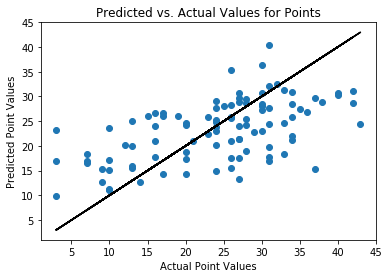

In [40]:
# create training and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3)

# fit model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

# generate predictions for points
Y_pred_test = regr.predict(X_test)

# plot predictions and actual values
plt.scatter(Y_test, Y_pred_test)
# identity line
plt.plot(Y_test, Y_test, color="Black") 
plt.xlabel("Actual Point Values")
plt.ylabel("Predicted Point Values")
plt.title("Predicted vs. Actual Values for Points")

We then used our model to predict teams that would win in matchups. We predicted points for each team in the matchup and looked at whichever team had greater points would win. Our inputs for the passing and rushing yards would be the average passing and rushings yards the team has obtained over the season so far. 

In [68]:
# function takes in matchup and uses linear regression model to predict winner

def matchup (team1_name, team2_name):
    
    #  if user input does not exist
    teams = differentials_melt['Team'].unique()
    if (team1_name not in teams):
        return (team1_name + ' does not exist')
    elif (team2_name not in teams):
        return (team2_name + ' does not exist')

    # create dataframe with pass yards and rush yards for both teams 
    team1 = differentials_melt[differentials_melt['Team'] == team1_name]
    team1 = team1[["PassYds", "RushYds"]].agg([np.mean])
    team2 = differentials_melt[differentials_melt['Team'] == team2_name]
    team2 = team2[['PassYds', 'RushYds']].agg([np.mean])
    
    # predict points from model
    pts1 = regr.predict(team1)
    pts2 = regr.predict(team2)   
    pts1 = sum(pts1) / len(pts1)
    pts2 = sum(pts2) / len(pts2)
            
    if (pts1 > pts2):
        return (team1_name)
    else:
        return(team2_name)

Predictions would be very useful when it comes to the big tournament at the end of an NFL season, the playoffs where out of 32 teams, 12 teams enter and are in the hunt for becoming the Super Bowl champions of the year. While the current playoff bracket hasn't been set in stone since all teams have not finished playing their games for the regular season, there are projected ones based on all team's records till this point. Since our data is of only week 11, we decided to look at the playoff bracket as of week 11. From <a href='cbssports.com/nfl/news/2019-nfl-playoff-picture-here-are-the-projected-postseason-chances-for-all-32-teams-heading-into-week-12/'>CBS Sports</a>, we were able to get a playoff bracket: 

Wild-card round projection
AFC

(6) Colts at (3) Chiefs

(5) Bills at (4) Texans

Byes: Patriots, Ravens

NFC 

(6) Vikings at (3) Packers

(5) Seahawks at (4) Cowboys

Byes: Saints, 49ers

To put this in bracket form, 

<img src="NFLPlayoffBracket.png">

So now we can matchup teams accordingly and use the winners from each game to predict the final outcome of the playoff tournament.

In [72]:
wildcardAFC1 = matchup('HOU', 'BUF')
wildcardAFC2 = matchup('KC', 'IND')
AFCdiv1 = matchup(str(wildcardAFC1), 'NE')
AFCdiv2 = matchup(wildcardAFC2, 'BAL')
AFCchampion = matchup(AFCdiv1, AFCdiv2)
print(AFCchampion + " will win the AFC championship!")

wildcardNFC1 = matchup('DAL', 'SEA')
wildcardNFC2 = matchup('GB', 'MIN')
NFCdiv1 = matchup(wildcardNFC1, 'NE')
NFCdiv2 = matchup(wildcardNFC2, 'SF')
NFCchampion = matchup(NFCdiv1, NFCdiv2)
print(NFCchampion + " will win the NFC championship!")

SuperBowlChampion = matchup(AFCchampion, NFCchampion)
print()
print(SuperBowlChampion + " will win the Super Bowl!")

BAL will win the AFC championship!
DAL will win the NFC championship!

DAL will win the Super Bowl!


Thus, using our multiple linear regression model, predicting the outcomes of the 11 games played in the playoff tournament, we were able to predict the the Super Bowl would be between the Baltimore Ravens and Dallas Cowboys and in the end, the Dallas Cowboys would win. 

## Conclusion

### Key Attributes For a Team's Performance

We were able to look at various factors that influences plays and how a team performs throughout a game and the entire season. These factors include rushing yards, passing yards, third down conversions, interceptions, etc. By comparing them to records of teams up until that point in the season, we were able to determine that rushing yards and passing yards have the most influence on how a team performs in a game as the higher rushing and passing yards a team has, the better the team record tends to be. The other factors such as fumbles and field goals made have an influence but not as great as one since teams with a better fumble recovery rate and field goals made rate do not necessarily have a good record. 

### Predicting Field Goals and Games

Using these plays and our analysis, we looked into two very different things.

The first we looked at was predicting field goal attempts. Since kickers do have an important job in making not only field goals but also extra points, it would be important for teams to know where their kicker is doing well and where they are lacking in field goal attempts. We were able to model field goal attempts using a decision tree and were able to predict outcomes with 80% accuracy. Thus, teams could use this model to input various yardage from where their kicker could potentially make a field goal and see the outcome of this attempt to understand where improvements could be made.

The second model we looked into was using rushing and passing yards to predict the number of points a team. We were able to confirm that these do have an influence in the number of points and create a linear model using these observed variables. Since predicting who wins the Super Bowl is a very popular bet among many, we used our model to predict matchups between teams in the playoffs and used the results of the initial games to predict all of the games in the tournament to come out with the Dallas Cowboys being the eventual winners of the Super Bowl. There are a lot of other factors, though, that would also influence this outcome that we did not take into account, but based on factors deemed important in a team's performance and data analyzed up till week 11, we would say that the Cowboys have a very good chance of winning the Super Bowl this year. 